### **Overview**

This repository contains datasets related to global population statistics, focusing on the population of various countries and the world over a range of years. The primary data set is **Population_Data.csv**, from Data World Bank which the United Nations uses to collect population data.

#### **Key Features:**
- **Countries and Regions:** The data includes population statistics for various countries, as well as a row representing the global population.
- **Time Span:** The dataset spans multiple years, providing a historical perspective on population growth and trends.
- **Columns:** The dataset contains information such as:
  - **Country Name:** The name of the country or region.
  - **Population Data (by Year):** Population data for each country across multiple years.
  - **Averages:** Calculated averages of the population over the years for each country (excluding missing values).

#### **Data Cleaning and Processing:**
- The dataset has been cleaned by removing irrelevant columns, such as "Country Code," "Indicator Name," and "Indicator Code."
- Any unnamed columns were also removed to ensure clarity and consistency.
- Averages of population across years were computed and added as a new column.
- The dataset has been saved in a modified version as `Population_Data_Manipulated.csv`.

#### **Visualization:**
- A plot of the **World Population Over Time** has been created to visualize global population trends.

This repository serves as a useful resource for analyzing and visualizing population growth trends across the globe, with a focus on time-based analysis.

### **Data Preparation and Visualization**

1. **Importing Libraries**  
   First, we will import the necessary libraries: NumPy, Pandas, and Matplotlib.  
   > `NumPy` will help us with numerical operations, `Pandas` will be used for data manipulation, and `Matplotlib` will be used for plotting graphs.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

2. **Read the Dataset**  
   Next, we will read the `Population_Data.csv` file using `Pandas`.  
   > Make sure that the file is in the correct directory, or provide the full path to the file. We will load the dataset into a DataFrame called `df`.

In [13]:
df = pd.read_csv('Population_Data.csv')
print(df.head)

<bound method NDFrame.head of                     Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code      1960      1961      1962      1963      1964  \
0      SP.POP.TOTL     54608     55811     56682     57475     58178   
1      SP

3. **Clean the Data**  
   To clean the dataset, we will remove unneeded columns and unnamed columns.  
   > We will drop the columns `Country Code`, `Indicator Name`, and `Indicator Code`, as they are not needed for our analysis. Additionally, we will remove any unnamed columns that may be present.

In [14]:
df = df.drop(["Country Code", 'Indicator Name', 'Indicator Code'], axis=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.head)

<bound method NDFrame.head of                     Country Name      1960      1961      1962      1963  \
0                          Aruba     54608     55811     56682     57475   
1    Africa Eastern and Southern 130692579 134169237 137835590 141630546   
2                    Afghanistan   8622466   8790140   8969047   9157465   
3     Africa Western and Central  97256290  99314028 101445032 103667517   
4                         Angola   5357195   5441333   5521400   5599827   
..                           ...       ...       ...       ...       ...   
261                       Kosovo    990150   1014211   1038618   1063175   
262                  Yemen, Rep.   5542459   5646668   5753386   5860197   
263                 South Africa  16520441  16989464  17503133  18042215   
264                       Zambia   3119430   3219451   3323427   3431381   
265                     Zimbabwe   3806310   3925952   4049778   4177931   

         1964      1965      1966      1967      1968  ..

4. **Formatting for Float Numbers**  
   To avoid displaying numbers in scientific notation, we will set the display format for floats to show without scientific notation.  
   > This helps with readability when working with large numbers, such as populations.

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

5. **Calculate Row-Wise Averages**  
   We will now calculate the average population for each country across the years.  
   > The new column `Averages` will hold the mean value for each row, skipping any `NaN` values.

In [16]:
df["Averages"] = df.iloc[:, 1:].mean(axis=1)

6. **Save the Modified Data**  
   We will save the cleaned data to a new CSV file called `Population_Data_Manipulated.csv`.  
   > The `index=False` parameter ensures that the index column is not written to the file.

In [17]:
df.to_csv("Population_Data_Manipulated.csv", index=False)

7. **Extract World Population Data**  
   Now, let's isolate the world population data from the dataset.  
   > We will filter the rows where the `Country Name` is 'World' and transpose the data to get the years as rows and the population as a column.

In [18]:
world_population = df[df['Country Name'] == 'World'].iloc[:, 1:-1].T
world_population.columns = ['World Population']

8. **Ensure Years Are Integers**  
   It's important to make sure that the years are treated as integers. This step ensures that they are displayed correctly in the plot.


In [19]:
world_population.index = world_population.index.astype(int)

9. **Plot the World Population Over Time**  
   Finally, we will plot the world population over time using `Matplotlib`.  
   > This will display the population growth over the years, with markers for each data point.

<Axes: title={'center': 'World Population Over Time'}, xlabel='Year', ylabel='Population'>

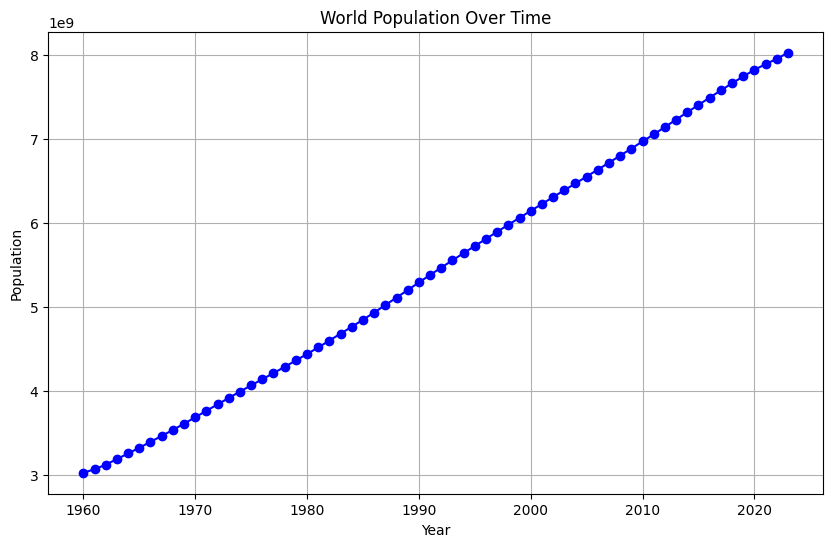

In [21]:
world_population.plot(
    figsize=(10, 6),
    marker='o',
    linestyle='-',
    color='b',
    title='World Population Over Time',
    xlabel='Year',
    ylabel='Population',
    grid=True,
    legend=False
)